In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import itertools
# ----設定繪圖-------
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Microsoft Dexter'] 
plt.rcParams['axes.unicode_minus'] = False  
from matplotlib.font_manager import FontProperties 
import seaborn as sns 
myfont=FontProperties(fname='Microsoft JhengHei',size=14) 
sns.set(font=myfont.get_family()) 
sns.set_style("darkgrid",{"font.sans-serif":['Microsoft Dexter']}) 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.max_seq_items = None
#------時間------
from datetime import datetime,timedelta
from datetime import datetime as dt
import time

In [5]:
df_head = pd.read_csv('D:/karma5.0/0121/head.csv')

In [7]:
df_head.columns

Index(['DDwFD', 'contractsn', 'DATE', 'DuringMBA', 'RH', 'AH', 're', 'fbCNT',
       'nCR', 'nMR', 'nTR', 'nconcompla', 'nconcompli', 'nmatcompla',
       'nmatcompli', 'nteccompla', 'accLIKE', 'proLIKE', 'accDLIKE',
       'proDLIKE', 'FavorCNT', 'BlockCNT', 'AddFavorCNT', 'AddBlockCNT',
       'star', 'isIntCNT', 'LVdiffCNT', 'MGMLead', 'MGMRes', 'MGMDemo',
       'MGMDeal', 'conUUCCNT', 'conSOUCNT', 'conSERCNT', 'conTWBCNT',
       'conOTHCNT', 'conLigCNT', 'conMedCNT', 'conTanCNT', 'conDarCNT',
       'conEx01CNT', 'conEx03CNT', 'conEx12CNT', 'conEx24CNT', 'conage30CNT',
       'conage40CNT', 'conage50CNT', 'conage60CNT', 'conage61CNT', 'conMCNT',
       'conFCNT', 'helpCNT', 'helpCNTmax', 'help3mCNT', 'help3mCNTmax',
       'helpITCNT', 'helpITCNTmax', 'helpIT3mCNT', 'helpIT3mCNTmax',
       'helpIiCNT', 'helpIiCNTmax', 'helpIi3mCNT', 'helpIi3mCNTmax',
       'helpMaCNT', 'helpMaCNTmax', 'helpMa3mCNT', 'helpMa3mCNTmax',
       'helpTeCNT', 'helpTeCNTmax', 'helpTe3mCNT', 'helpTe3mC

In [84]:
df = pd.read_csv('D:/karma5.0/0212/K5datasetsOneM.csv',names=df_head.columns.tolist())

In [86]:
L11=[]
L22=list(df.isnull().sum()/len(df))
for i in df:
    #print('column name','kinds counts')
    L11.append((i,len(df[str(i)].value_counts())))
print('-'*10,'Item','-'*10)
df0 = pd.DataFrame(L11,columns=['column_name','species_counts'])
print(df0[df0['species_counts']==1])
print('-'*10,'value_counts','-'*10)
for i in df0['column_name'][df0['species_counts']==1]:
    print(df[str(i)].value_counts())

---------- Item ----------
        column_name  species_counts
163    L1D_BlockCNT               1
404    L14D_conMCNT               1
435  WarrantyPeriod               1
---------- value_counts ----------
1.0    38
Name: L1D_BlockCNT, dtype: int64
0.0    776406
Name: L14D_conMCNT, dtype: int64
7    1000000
Name: WarrantyPeriod, dtype: int64


In [87]:
dff_all = df[['DDwFD', 'contractsn', 'DATE', 'DuringMBA', 'RH', 'AH', 're', 'fbCNT',
       'nCR', 'nMR', 'nTR', 'nconcompla', 'nconcompli', 'nmatcompla',
       'nmatcompli', 'nteccompla', 'accLIKE', 'proLIKE', 'accDLIKE',
       'proDLIKE', 'FavorCNT', 'BlockCNT', 'AddFavorCNT', 'AddBlockCNT',
       'star', 'isIntCNT', 'LVdiffCNT', 'MGMLead', 'MGMRes', 'MGMDemo',
       'MGMDeal', 'conUUCCNT', 'conSOUCNT', 'conSERCNT', 'conTWBCNT',
       'conOTHCNT', 'conLigCNT', 'conMedCNT', 'conTanCNT', 'conDarCNT',
       'conEx01CNT', 'conEx03CNT', 'conEx12CNT', 'conEx24CNT', 'conage30CNT',
       'conage40CNT', 'conage50CNT', 'conage60CNT', 'conage61CNT', 'conMCNT',
       'conFCNT', 'helpCNT', 'helpCNTmax', 'help3mCNT', 'help3mCNTmax',
       'helpITCNT', 'helpITCNTmax', 'helpIT3mCNT', 'helpIT3mCNTmax',
       'helpIiCNT', 'helpIiCNTmax', 'helpIi3mCNT', 'helpIi3mCNTmax',
       'helpMaCNT', 'helpMaCNTmax', 'helpMa3mCNT', 'helpMa3mCNTmax',
       'helpTeCNT', 'helpTeCNTmax', 'helpTe3mCNT', 'helpTe3mCNTmax',
       'helpconCNT', 'helpconCNTmax', 'helpcon3mCNT', 'helpcon3mCNTmax',
       'ALL_RH', 'ALL_AH', 'ALL_re', 'ALL_fbCNT', 'ALL_nCR', 'ALL_nMR',
       'ALL_nTR', 'ALL_nconcompla', 'ALL_nconcompli', 'ALL_nmatcompla',
       'ALL_nmatcompli', 'ALL_nteccompla', 'ALL_accLIKE', 'ALL_proLIKE',
       'ALL_accDLIKE', 'ALL_proDLIKE', 'ALL_FavorCNT', 'ALL_BlockCNT',
       'ALL_AddFavorCNT', 'ALL_AddBlockCNT', 'ALL_star', 'ALL_isIntCNT',
       'ALL_LVdiffCNT', 'ALL_MGMLead', 'ALL_MGMRes', 'ALL_MGMDemo',
       'ALL_MGMDeal', 'ALL_conUUCCNT', 'ALL_conSOUCNT', 'ALL_conSERCNT',
       'ALL_conTWBCNT', 'ALL_conOTHCNT', 'ALL_conLigCNT', 'ALL_conMedCNT',
       'ALL_conTanCNT', 'ALL_conDarCNT', 'ALL_conEx01CNT', 'ALL_conEx03CNT',
       'ALL_conEx12CNT', 'ALL_conEx24CNT', 'ALL_conage30CNT',
       'ALL_conage40CNT', 'ALL_conage50CNT', 'ALL_conage60CNT',
       'ALL_conage61CNT', 'ALL_conMCNT', 'ALL_conFCNT', 'ALL_helpCNT',
       'ALL_helpCNTmax', 'ALL_help3mCNT', 'ALL_help3mCNTmax', 'ALL_helpITCNT',
       'ALL_helpITCNTmax', 'ALL_helpIT3mCNT', 'ALL_helpIT3mCNTmax',
       'ALL_helpIiCNT', 'ALL_helpIiCNTmax', 'ALL_helpIi3mCNT',
       'ALL_helpIi3mCNTmax', 'ALL_helpMaCNT', 'ALL_helpMaCNTmax',
       'ALL_helpMa3mCNT', 'ALL_helpMa3mCNTmax', 'ALL_helpTeCNT',
       'ALL_helpTeCNTmax', 'ALL_helpTe3mCNT', 'ALL_helpTe3mCNTmax',
       'ALL_helpconCNT', 'ALL_helpconCNTmax', 'ALL_helpcon3mCNT',
       'ALL_helpcon3mCNTmax','FDsellingdate',
       'product_sdate', 'mb', 'mb_STV', 'mbdate', 'WarrantyPeriod', 'mbaCNT',
       'mbadate_First', 'mbadate_New', 'MBA_technical', 'MBA_customer',
       'MBA_Scheduling', 'MBA_Class', 'MBA_Service']]
dff_all.shape

(1000000, 160)

In [88]:
dff_all['MBA_technical'] = dff_all['MBA_technical'].fillna(0)
dff_all['MBA_customer'] = dff_all['MBA_customer'].fillna(0)
dff_all['MBA_Scheduling'] = dff_all['MBA_Scheduling'].fillna(0)
dff_all['MBA_Class'] = dff_all['MBA_Class'].fillna(0)
dff_all['MBA_Service'] = dff_all['MBA_Service'].fillna(0)
dff_all['MBA_total']=dff_all['MBA_Class']+dff_all['MBA_Scheduling']+dff_all['MBA_Service']+dff_all['MBA_customer']+dff_all['MBA_technical']
dff_all['mbadate_First']=pd.to_datetime(dff_all['mbadate_First']).dt.date
dff_all['mbadate_New']=pd.to_datetime(dff_all['mbadate_New']).dt.date
dff_all['FDsellingdate']=pd.to_datetime(dff_all['FDsellingdate']).dt.date
dff_all['mbdate']=pd.to_datetime(dff_all['mbdate']).dt.date
dff_all['mbadiff'] = dff_all['mbadate_New']-dff_all['mbadate_First']
dff_all['mbtime'] = dff_all['mbdate']-dff_all['FDsellingdate']
dff_all['mbaFtoSelltime'] = dff_all['mbadate_First']-dff_all['FDsellingdate']
dff_all['mbaNtoSelltime'] = dff_all['mbadate_New']-dff_all['FDsellingdate']
dff_all['mbFdiff'] = dff_all['mbdate']-dff_all['mbadate_First']
dff_all['mbNdiff'] = dff_all['mbdate']-dff_all['mbadate_New']
dff_all = dff_all.drop(['MBA_technical','MBA_customer','MBA_Scheduling','MBA_Class','MBA_Service'],axis=1)
dff_all = dff_all.drop(['ALL_nconcompli','ALL_nmatcompli'],axis=1)
dff_all = dff_all.drop(['mbadate_First','mbadate_New','FDsellingdate','mbdate',],axis=1)
dff_all = dff_all.drop(['WarrantyPeriod'],axis=1)
dff_all = dff_all.drop(['product_sdate'],axis=1)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [89]:
dff_all.describe()

,DDwFD,contractsn,DuringMBA,RH,AH,re,fbCNT,nCR,nMR,nTR,nconcompla,nconcompli,nmatcompla,nmatcompli,nteccompla,accLIKE,proLIKE,accDLIKE,proDLIKE,FavorCNT,BlockCNT,AddFavorCNT,AddBlockCNT,star,isIntCNT,LVdiffCNT,MGMLead,MGMRes,MGMDemo,MGMDeal,conUUCCNT,conSOUCNT,conSERCNT,conTWBCNT,conOTHCNT,conLigCNT,conMedCNT,conTanCNT,conDarCNT,conEx01CNT,conEx03CNT,conEx12CNT,conEx24CNT,conage30CNT,conage40CNT,conage50CNT,conage60CNT,conage61CNT,conMCNT,conFCNT,helpCNT,helpCNTmax,help3mCNT,help3mCNTmax,helpITCNT,helpITCNTmax,helpIT3mCNT,helpIT3mCNTmax,helpIiCNT,helpIiCNTmax,helpIi3mCNT,helpIi3mCNTmax,helpMaCNT,helpMaCNTmax,helpMa3mCNT,helpMa3mCNTmax,helpTeCNT,helpTeCNTmax,helpTe3mCNT,helpTe3mCNTmax,helpconCNT,helpconCNTmax,helpcon3mCNT,helpcon3mCNTmax,ALL_RH,ALL_AH,ALL_re,ALL_fbCNT,ALL_nCR,ALL_nMR,ALL_nTR,ALL_nconcompla,ALL_nmatcompla,ALL_nteccompla,ALL_accLIKE,ALL_proLIKE,ALL_accDLIKE,ALL_proDLIKE,ALL_FavorCNT,ALL_BlockCNT,ALL_AddFavorCNT,ALL_AddBlockCNT,ALL_star,ALL_isIntCNT,ALL_LVdiffCNT,ALL_MGMLead,ALL_MGMRes,ALL_MGMDemo,ALL_MGMDeal,ALL_conUUCCNT,ALL_conSOUCNT,ALL_conSERCNT,ALL_conTWBCNT,ALL_conOTHCNT,ALL_conLigCNT,ALL_conMedCNT,ALL_conTanCNT,ALL_conDarCNT,ALL_conEx01CNT,ALL_conEx03CNT,ALL_conEx12CNT,ALL_conEx24CNT,ALL_conage30CNT,ALL_conage40CNT,ALL_conage50CNT,ALL_conage60CNT,ALL_conage61CNT,ALL_conMCNT,ALL_conFCNT,ALL_helpCNT,ALL_helpCNTmax,ALL_help3mCNT,ALL_help3mCNTmax,ALL_helpITCNT,ALL_helpITCNTmax,ALL_helpIT3mCNT,ALL_helpIT3mCNTmax,ALL_helpIiCNT,ALL_helpIiCNTmax,ALL_helpIi3mCNT,ALL_helpIi3mCNTmax,ALL_helpMaCNT,ALL_helpMaCNTmax,ALL_helpMa3mCNT,ALL_helpMa3mCNTmax,ALL_helpTeCNT,ALL_helpTeCNTmax,ALL_helpTe3mCNT,ALL_helpTe3mCNTmax,ALL_helpconCNT,ALL_helpconCNTmax,ALL_helpcon3mCNT,ALL_helpcon3mCNTmax,mb,mb_STV,mbaCNT,MBA_total,mbadiff,mbtime,mbaFtoSelltime,mbaNtoSelltime,mbFdiff,mbNdiff
count,1000000.000000,1.000000e+06,1000000.000000,297307.000000,297307.000000,297307.000000,297307.000000,139504.000000,135843.000000,147073.000000,297307.000000,297307.000000,297307.000000,297307.000000,297307.000000,297307.000000,297307.000000,297307.000000,297307.000000,297307.000000,297307.000000,297307.000000,297307.000000,149859.000000,267302.000000,25935.000000,8853.000000,8853.000000,8853.000000,8853.000000,297307.000000,297307.000000,297307.000000,297307.000000,297307.000000,297307.000000,297307.000000,297307.000000,297307.000000,297307.000000,297307.000000,297307.000000,297307.000000,297307.000000,297307.000000,297307.000000,297307.000000,297307.000000,297307.000000,297307.000000,6640.000000,6640.000000,6640.000000,6640.000000,6640.000000,6640.000000,6640.000000,6640.000000,6640.000000,6640.000000,6640.000000,6640.000000,6640.000000,6640.000000,6640.000000,6640.000000,6640.000000,6640.000000,6640.000000,6640.000000,60293.000000,60293.000000,60293.000000,60293.000000,776406.000000,776406.000000,765761.000000,776406.000000,675306.000000,675295.000000,675315.000000,182082.000000,182082.000000,368460.000000,113328.000000,84929.000000,37929.000000,47337.000000,140925.000000,910.000000,363560.000000,60833.000000,691736.000000,765097.000000,360160.000000,160317.000000,160317.000000,160317.000000,160317.000000,776406.000000,776406.000000,776406.000000,776406.000000,776406.000000,776406.000000,776406.000000,776406.000000,776406.000000,776406.000000,776406.000000,776406.000000,776406.000000,776406.000000,776406.000000,776406.000000,776406.000000,776406.000000,776406.000000,776406.000000,84450.000000,84450.000000,84450.000000,84450.000000,84450.000000,84450.000000,84450.000000,84450.000000,84450.000000,84450.000000,84450.000000,84450.000000,84450.000000,84450.000000,84450.000000,84450.000000,84450.000000,84450.000000,84450.000000,84450.000000,570191.000000,570191.000000,570191.000000,570191.000000,1000000.000000,1000000.000000,226647.000000,1000000.000000,226647,125159,226647,226647,124821,124821
mean,26.999997,5.151905e+07,0.005337,1.212239,1.069433,0.021574,0.535968,-0.032253,-0.049651,-0.061582,0.007433,0.027772,0.013297,0.022053,0.035829,0.018604,0.012

In [90]:
df_test = dff_all

df_test['mbadiff'] = (df_test['mbadiff'] / np.timedelta64(1, 'D')).astype(float)
df_test['mbaFtoSelltime'] = (df_test['mbaFtoSelltime'] / np.timedelta64(1, 'D')).astype(float)
df_test['mbaNtoSelltime'] = (df_test['mbaNtoSelltime'] / np.timedelta64(1, 'D')).astype(float)

df_test['RH'] = df_test['RH'].fillna(0)
df_test['AH'] = df_test['AH'].fillna(0)
df_test['re'] = df_test['re'].fillna(0)
df_test['fbCNT'] = df_test['fbCNT'].fillna(0)
df_test['nCR'] = df_test['nCR'].fillna(0)
df_test['nMR'] = df_test['nMR'].fillna(0)
df_test['nTR'] = df_test['nTR'].fillna(0)
#mean_nconcompla = df_test['nconcompla'].mean()
#mean_nmatcompla = df_test['nmatcompla'].mean()
#mean_nteccompla = df_test['nteccompla'].mean()
df_test['nconcompla'] = df_test['nconcompla'].fillna(0)
df_test['nmatcompla'] = df_test['nmatcompla'].fillna(0)
df_test['nteccompla'] = df_test['nteccompla'].fillna(0)
df_test['star'] = df_test['star'].fillna(1)
df_test = df_test[df_test['star']<=5.0]
df_test['ALL_star'] = df_test['ALL_star'].fillna(1)
df_test = df_test[df_test['ALL_star']<=10.0]
df_test['isIntCNT'] = df_test['isIntCNT'].fillna(0)
df_test['ALL_RH'] = df_test['ALL_RH'].fillna(0)
df_test['ALL_AH'] = df_test['ALL_AH'].fillna(0)
df_test['ALL_re'] = df_test['ALL_re'].fillna(0)
df_test['ALL_fbCNT'] = df_test['ALL_fbCNT'].fillna(0)
df_test['ALL_nCR'] = df_test['ALL_nCR'].fillna(1)
df_test['ALL_nMR'] = df_test['ALL_nMR'].fillna(1)
df_test['ALL_nTR'] = df_test['ALL_nTR'].fillna(1)
df_test['ALL_nconcompla'] = df_test['ALL_nconcompla'].fillna(1)
df_test['ALL_nmatcompla'] = df_test['ALL_nmatcompla'].fillna(1)
df_test['ALL_nteccompla'] = df_test['ALL_nteccompla'].fillna(1)
df_test['ALL_isIntCNT'] = df_test['ALL_isIntCNT'].fillna(0)
df_test['MGM_total'] = df_test['MGMLead']+df_test['MGMRes']+df_test['MGMDemo']+df_test['MGMDeal']
df_test['ALL_MGM_total']= df_test['ALL_MGMLead']+df_test['ALL_MGMRes']+df_test['ALL_MGMDemo']+df_test['ALL_MGMDeal']
df_test['Like_total'] = df_test['accLIKE']+df_test['proLIKE']
df_test['ALL_Like_total'] = df_test['ALL_accLIKE']+df_test['ALL_proLIKE']
df_test['DLike_total'] = df_test['accDLIKE']+df_test['proDLIKE']
df_test['ALL_DLike_total'] = df_test['ALL_accDLIKE']+df_test['ALL_proDLIKE']
df_test['help_total'] = df_test['helpITCNT']+df_test['helpIiCNT']+df_test['helpTeCNT']+df_test['helpMaCNT']+df_test['helpconCNT']
df_test['ALL_help_total'] = df_test['ALL_helpITCNT']+df_test['ALL_helpIiCNT']+df_test['ALL_helpTeCNT']+df_test['ALL_helpMaCNT']+df_test['ALL_helpconCNT']
df_test['help_max_total'] = df_test['helpITCNTmax']+df_test['helpIiCNTmax']+df_test['helpTeCNTmax']+df_test['helpMaCNTmax']+df_test['helpconCNTmax']
df_test['ALL_help_max_total'] = df_test['ALL_helpITCNTmax']+df_test['ALL_helpIiCNTmax']+df_test['ALL_helpTeCNTmax']+df_test['ALL_helpMaCNTmax']+df_test['ALL_helpconCNTmax']
df_test['3mhelp_max_total'] = df_test['helpIT3mCNTmax']+df_test['helpIi3mCNTmax']+df_test['helpTe3mCNTmax']+df_test['helpMa3mCNTmax']+df_test['helpcon3mCNTmax']
df_test['ALL3m_help_max_total'] = df_test['ALL_helpIT3mCNTmax']+df_test['ALL_helpIi3mCNTmax']+df_test['ALL_helpTe3mCNTmax']+df_test['ALL_helpMa3mCNTmax']+df_test['ALL_helpcon3mCNTmax']
print(df_test.shape)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


(998698, 166)


In [91]:
df_test = df_test.fillna(0)

df_test = df_test[df_test['mbaFtoSelltime']>=0.0]
df_test = df_test[df_test['mbaNtoSelltime']>=0.0]

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing integers to fillna is deprecated, will raise a TypeError in a future version.  To retain the old behavior, pass pd.Timedelta(seconds=n) instead.
  """Entry point for launching an IPython kernel.


In [92]:
df_test.columns

Index(['DDwFD', 'contractsn', 'DATE', 'DuringMBA', 'RH', 'AH', 're', 'fbCNT',
       'nCR', 'nMR', 'nTR', 'nconcompla', 'nconcompli', 'nmatcompla',
       'nmatcompli', 'nteccompla', 'accLIKE', 'proLIKE', 'accDLIKE',
       'proDLIKE', 'FavorCNT', 'BlockCNT', 'AddFavorCNT', 'AddBlockCNT',
       'star', 'isIntCNT', 'LVdiffCNT', 'MGMLead', 'MGMRes', 'MGMDemo',
       'MGMDeal', 'conUUCCNT', 'conSOUCNT', 'conSERCNT', 'conTWBCNT',
       'conOTHCNT', 'conLigCNT', 'conMedCNT', 'conTanCNT', 'conDarCNT',
       'conEx01CNT', 'conEx03CNT', 'conEx12CNT', 'conEx24CNT', 'conage30CNT',
       'conage40CNT', 'conage50CNT', 'conage60CNT', 'conage61CNT', 'conMCNT',
       'conFCNT', 'helpCNT', 'helpCNTmax', 'help3mCNT', 'help3mCNTmax',
       'helpITCNT', 'helpITCNTmax', 'helpIT3mCNT', 'helpIT3mCNTmax',
       'helpIiCNT', 'helpIiCNTmax', 'helpIi3mCNT', 'helpIi3mCNTmax',
       'helpMaCNT', 'helpMaCNTmax', 'helpMa3mCNT', 'helpMa3mCNTmax',
       'helpTeCNT', 'helpTeCNTmax', 'helpTe3mCNT', 'helpTe3mC

In [93]:
df_Sum = df_test[['DDwFD', 'contractsn', 'DATE', 'DuringMBA', 'RH', 'AH', 're', 'fbCNT',
       'nCR', 'nMR', 'nTR', 'nconcompla', 'nmatcompla','nteccompla', 
       'star', 'isIntCNT','ALL_RH', 'ALL_AH', 'ALL_re', 'ALL_fbCNT', 'ALL_nCR', 'ALL_nMR',
       'ALL_nTR', 'ALL_nconcompla', 'ALL_nmatcompla', 'ALL_nteccompla',
       'ALL_accLIKE', 'ALL_proLIKE', 'ALL_accDLIKE', 'ALL_proDLIKE',
       'ALL_FavorCNT', 'ALL_BlockCNT', 'ALL_AddFavorCNT', 'ALL_AddBlockCNT',
       'ALL_star', 'ALL_isIntCNT',
       'ALL_conUUCCNT','ALL_conSOUCNT', 'ALL_conSERCNT', 'ALL_conTWBCNT', 'ALL_conOTHCNT',
       'ALL_conLigCNT', 'ALL_conMedCNT', 'ALL_conTanCNT', 'ALL_conDarCNT',
       'ALL_conEx01CNT', 'ALL_conEx03CNT', 'ALL_conEx12CNT', 'ALL_conEx24CNT',
       'ALL_conage30CNT', 'ALL_conage40CNT', 'ALL_conage50CNT',
       'ALL_conage60CNT', 'ALL_conage61CNT', 'ALL_conMCNT', 'ALL_conFCNT',
       'ALL_helpCNT','ALL_help3mCNT',
       'mb', 'mb_STV', 'mbaCNT','mbtime',
       'MBA_total', 'mbadiff','mbaFtoSelltime', 'mbaNtoSelltime',
       'ALL_MGM_total','ALL_Like_total', 'ALL_DLike_total','ALL_help_total', 'ALL_help_max_total','ALL3m_help_max_total']]
df_Sum.shape

(998626, 72)

In [94]:
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict,cross_validate
from sklearn.ensemble import IsolationForest
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import accuracy_score,f1_score,r2_score,recall_score,roc_auc_score,precision_recall_curve,roc_curve,auc
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_predict,cross_val_score
from sklearn.decomposition import PCA
import matplotlib.pylab as plt
import scikitplot as skplt

In [95]:
df_ML = df_Sum[['DuringMBA', 'RH', 'AH', 're', 'fbCNT',
       'nCR', 'nMR', 'nTR', 'nconcompla', 'nmatcompla','nteccompla', 
        'isIntCNT','ALL_RH', 'ALL_AH', 'ALL_re', 'ALL_fbCNT', 'ALL_nCR', 'ALL_nMR',
       'ALL_nTR', 'ALL_nconcompla', 'ALL_nmatcompla', 'ALL_nteccompla',
       'ALL_accLIKE', 'ALL_proLIKE', 'ALL_accDLIKE', 'ALL_proDLIKE',
       'ALL_FavorCNT', 'ALL_BlockCNT', 'ALL_AddFavorCNT', 'ALL_AddBlockCNT',
       'ALL_star', 'ALL_isIntCNT',
       'ALL_conUUCCNT','ALL_conSOUCNT', 'ALL_conSERCNT', 'ALL_conTWBCNT', 'ALL_conOTHCNT',
       'ALL_conLigCNT', 'ALL_conMedCNT', 'ALL_conTanCNT', 'ALL_conDarCNT',
       'ALL_conEx01CNT', 'ALL_conEx03CNT', 'ALL_conEx12CNT', 'ALL_conEx24CNT',
       'ALL_conage30CNT', 'ALL_conage40CNT', 'ALL_conage50CNT',
       'ALL_conage60CNT', 'ALL_conage61CNT', 'ALL_conMCNT', 'ALL_conFCNT',
       'ALL_helpCNT','ALL_help3mCNT',
       'mb', 'mb_STV', 'mbaCNT',
       'MBA_total', 'mbadiff','mbaFtoSelltime', 'mbaNtoSelltime',
       'ALL_MGM_total','ALL_Like_total', 'ALL_DLike_total','ALL_help_total', 'ALL_help_max_total','ALL3m_help_max_total']]

df_ML.shape

(998626, 67)

In [44]:
from category_encoders import TargetEncoder

In [97]:
y = df_ML['mb']
X = df_ML.drop(['mb'],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=40)
te = TargetEncoder(cols=['DuringMBA', 'RH', 'AH', 're', 'fbCNT',
       'nCR', 'nMR', 'nTR', 'nconcompla', 'nmatcompla','nteccompla', 
        'isIntCNT','ALL_RH', 'ALL_AH', 'ALL_re', 'ALL_fbCNT', 'ALL_nCR', 'ALL_nMR',
       'ALL_nTR', 'ALL_nconcompla', 'ALL_nmatcompla', 'ALL_nteccompla',
       'ALL_accLIKE', 'ALL_proLIKE', 'ALL_accDLIKE', 'ALL_proDLIKE',
       'ALL_FavorCNT', 'ALL_BlockCNT', 'ALL_AddFavorCNT', 'ALL_AddBlockCNT',
       'ALL_star', 'ALL_isIntCNT',
       'ALL_conUUCCNT','ALL_conSOUCNT', 'ALL_conSERCNT', 'ALL_conTWBCNT', 'ALL_conOTHCNT',
       'ALL_conLigCNT', 'ALL_conMedCNT', 'ALL_conTanCNT', 'ALL_conDarCNT',
       'ALL_conEx01CNT', 'ALL_conEx03CNT', 'ALL_conEx12CNT', 'ALL_conEx24CNT',
       'ALL_conage30CNT', 'ALL_conage40CNT', 'ALL_conage50CNT',
       'ALL_conage60CNT', 'ALL_conage61CNT', 'ALL_conMCNT', 'ALL_conFCNT',
       'ALL_helpCNT','ALL_help3mCNT',
        'mb_STV', 'mbaCNT',
       'MBA_total', 'mbadiff','mbaFtoSelltime', 'mbaNtoSelltime',
       'ALL_MGM_total','ALL_Like_total', 'ALL_DLike_total','ALL_help_total', 'ALL_help_max_total','ALL3m_help_max_total']).fit(X,y)
X_train_te = te.transform(X_train)
X_test_te = te.transform(X_test)
X_te = te.transform(X)

In [98]:
X_outliers = df_ML[df_ML['mb']==1]
y_outliers = X_outliers['mb']

X_outliers = X_outliers.drop(['mb'],axis=1)
X_outliers_te = te.transform(X_outliers)

D:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


Text(0.5, 1.0, 'Correlations Feature Importances for mb')

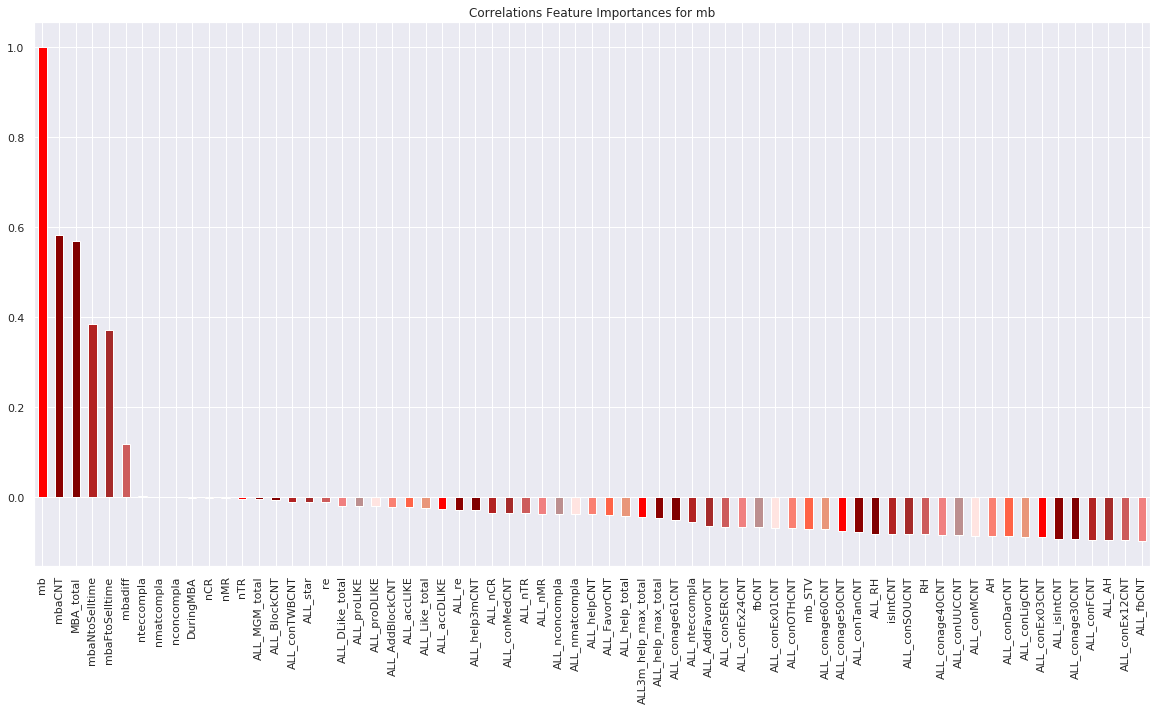

In [47]:
redcl=["red","darkred","maroon","firebrick","brown","indianred",
     "lightcoral","rosybrown",'mistyrose','salmon','tomato','darksalmon']


plt.figure(figsize=(20,10))
df_ML.corr()['mb'].sort_values(ascending = False).plot(kind='bar',colors=redcl)
plt.title("Correlations Feature Importances for mb")

[4.05017289e+06 2.76348645e+04 2.73375582e+04 6.50721980e+03
 5.88017684e+03 5.52612954e+03 5.31085127e+03 4.28181742e+03
 3.43073612e+03 3.18549017e+03]
[9.99894311e-01 4.65502108e-05 4.55539892e-05 2.58105896e-06
 2.10759785e-06 1.86144022e-06 1.71923503e-06 1.11754047e-06
 7.17433419e-07 6.18528207e-07]


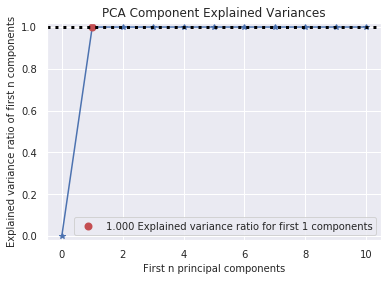

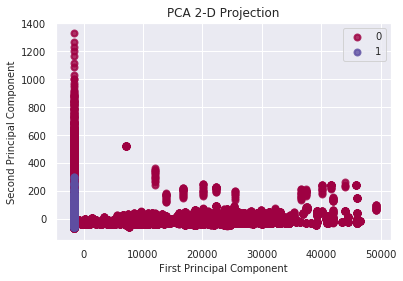

In [66]:
pca_1 = PCA(n_components=10,random_state=1)
pca_1.fit(X)
print(pca_1.singular_values_)
print(pca_1.explained_variance_ratio_)
skplt.decomposition.plot_pca_component_variance(pca_1)
plt.show()
skplt.decomposition.plot_pca_2d_projection(pca_1, X_train, y_train)
plt.show()

[236.69130704 108.19968843  77.92556448  46.83440405  39.03957835
  35.05886807  30.27848761  26.15092466  24.13796614  22.40262135]
[0.64081009 0.13391115 0.06945838 0.02508966 0.01743311 0.0140592
 0.01048656 0.00782238 0.00666448 0.00574067]


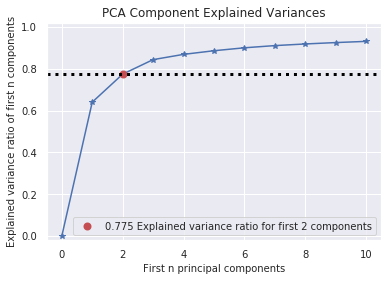

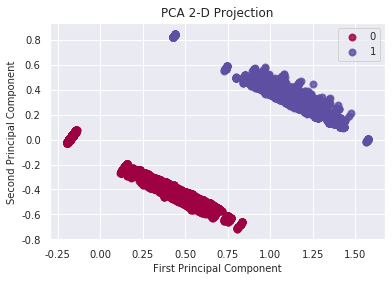

In [49]:
pca = PCA(n_components=10,random_state=1)
pca.fit(X_te)
print(pca.singular_values_)
print(pca.explained_variance_ratio_)
skplt.decomposition.plot_pca_component_variance(pca)
plt.show()
skplt.decomposition.plot_pca_2d_projection(pca, X_train_te, y_train)
plt.show()

In [50]:
df_pca = pd.DataFrame(pca.components_,columns=X_train_te.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9','PC-10'])
df_pca

,DuringMBA,RH,AH,re,fbCNT,nCR,nMR,nTR,nconcompla,nmatcompla,nteccompla,isIntCNT,ALL_RH,ALL_AH,ALL_re,ALL_fbCNT,ALL_nCR,ALL_nMR,ALL_nTR,ALL_nconcompla,ALL_nmatcompla,ALL_nteccompla,ALL_accLIKE,ALL_proLIKE,ALL_accDLIKE,ALL_proDLIKE,ALL_FavorCNT,ALL_BlockCNT,ALL_AddFavorCNT,ALL_AddBlockCNT,ALL_star,ALL_isIntCNT,ALL_conUUCCNT,ALL_conSOUCNT,ALL_conSERCNT,ALL_conTWBCNT,ALL_conOTHCNT,ALL_conLigCNT,ALL_conMedCNT,ALL_conTanCNT,ALL_conDarCNT,ALL_conEx01CNT,ALL_conEx03CNT,ALL_conEx12CNT,ALL_conEx24CNT,ALL_conage30CNT,ALL_conage40CNT,ALL_conage50CNT,ALL_conage60CNT,ALL_conage61CNT,ALL_conMCNT,ALL_conFCNT,ALL_helpCNT,ALL_help3mCNT,mb_STV,mbaCNT,MBA_total,mbadiff,mbaFtoSelltime,mbaNtoSelltime,ALL_MGM_total,ALL_Like_total,ALL_DLike_total,ALL_help_total,ALL_help_max_total,ALL3m_help_max_total
PC-1,-0.000105,0.008114,0.007967,0.000057,0.004277,0.016442,0.016961,0.018851,0.007639,0.007456,0.012033,0.006551,0.021559,0.023989,-0.000120,0.014690,0.016325,0.015782,0.016421,0.000884,0.000884,0.003213,0.000299,0.000343,0.000242,0.000580,0.003068,-0.000006,0.003717,-0.000047,0.005669,0.017124,0.014626,0.008851,0.005237,0.002505,0.005180,0.015312,0.001986,0.006655,0.010513,0.004858,0.007961,0.013802,0.007545,0.018022,0.008684,0.006215,0.006215,0.002690,0.013878,0.018462,0.001822,0.001769,0.590335,0.381725,0.380445,0.036664,0.420554,0.420623,0.001698,0.000508,0.000124,0.006408,0.001644,0.001451
PC-2,0.000369,0.013208,0.011908,0.000232,0.007595,0.028250,0.029060,0.031296,0.013389,0.014439,0.020347,0.009826,0.037666,0.039073,0.004096,0.025850,0.026205,0.027911,0.028112,0.004848,0.004848,0.008685,0.001627,0.001179,0.002224,0.002721,0.007460,0.000307,0.010375,0.002877,0.010983,0.033029,0.025983,0.014064,0.010655,-0.000549,0.015715,0.027308,0.008962,0.016316,0.017583,0.012113,0.020811,0.027788,0.019263,0.030463,0.024197,0.016237,0.013707,0.005746,0.027870,0.032651,0.004894,0.004479,0.788992,-0.315207,-0.317748,0.016603,-0.280889,-0.279827,0.003230,0.001525,0.001899,0.009722,0.004242,0.004359
PC-3,0.000067,-0.099825,-0.095490,-0.001019,-0.059642,-0.067784,-0.065287,-0.069000,-0.046449,-0.040174,-0.062416,-0.079533,-0.303401,-0.331902,-0.014152,-0.220716,-0.125340,-0.121553,-0.127459,-0.028134,-0.028134,-0.057803,-0.009512,-0.006775,-0.011159,-0.012699,-0.056261,-0.000890,-0.074526,-0.009207,-0.083998,-0.263609,-0.193436,-0.135274,-0.092750,-0.001553,-0.120134,-0.220422,-0.056020,-0.123392,-0.162743,-0.095377,-0.161233,-0.218755,-0.146684,-0.260336,-0.172259,-0.127462,-0.105498,-0.046783,-0.227853,-0.280181,-0.026275,-0.021813,0.149261,-0.007267,-0.008487,0.011762,-0.014016,-0.015090,-0.006384,-0.008154,-0.007238,-0.033850,-0.028885,-0.028941
PC-4,-0.000018,0.099298,0.108810,0.000709,0.111258,0.454586,0.468057,0.492719,0.232213,0.236867,0.334826,0.089553,-0.094184,-0.097043,0.000279,-0.006867,0.029991,0.023613,0.027969,0.005972,0.005972,0.019183,0.001946,0.001808,0.002381,0.011408,-0.000529,0.000230,0.002902,0.000575,-0.018962,-0.072894,-0.037053,-0.021090,-0.011800,0.004293,-0.016304,-0.047885,0.000452,-0.012970,-0.028742,-0.014526,-0.024752,-0.041992,-0.025169,-0.068235,-0.028054,-0.014762,-0.013438,-0.004701,-0.044787,-0.074451,0.003794,0.003137,-0.043360,0.059473,0.050026,0.070044,-0.045293,-0.056297,-0.001918,0.002254,0.002242,0.013289,0.001753,0.001306
PC-5,0.000152,-0.030723,-0.030258,-0.000192,-0.022647,-0.057554,-0.057040,-0.056694,-0.026887,-0.026505,-0.041024,-0.024211,0.008965,0.011368,0.000229,0.014375,0.027573,0.017615,0.038933,-0.000148,-0.000148,0.004561,0.000071,0.000813,0.000326,-0.001121,-0.002448,0.000114,-0.000209,-0.000313,0.004913,0.011790,0.027156,0.000494,0.003266,0.002098,0.000125,0.020282,-0.002157,0.006275,0.002574,0.001867,-0.002102,0.003936,0.003055,0.001210,-0.000728,0.006762,0.008331,0.008281,0.010409,0.002121,0.000609,0.004034,0.036482,0.490797,0.418908,0.387647,-0.440204,-0.466495,-0.002339,0.000689,-0.000215,0.005095,0.000381,-0.000013
PC-6,-0.000459,-0.010872,-0.011775,-0.000093,-0.006093,-0.018852,-0.023691,-0.015452,0.0053

In [58]:
irf = IsolationForest(
    n_estimators=100,
    max_samples='auto',
    contamination=0.20)
irf.fit(X_train_te)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.2,
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

In [59]:
y_irf_train = irf.predict(X_train_te)
y_irf_test = irf.predict(X_test_te)
y_irf_outliers = irf.predict(X_outliers_te)

In [60]:
y_pre_train_irf=y_irf_train
y_pre_train_irf[y_irf_train==1]=0
y_pre_train_irf[y_irf_train==-1]=1

y_pre_test_irf=y_irf_test
y_pre_test_irf[y_irf_test==1]=0
y_pre_test_irf[y_irf_test==-1]=1


y_pre_outliers_irf=y_irf_outliers
y_pre_outliers_irf[y_irf_outliers==1]=0
y_pre_outliers_irf[y_irf_outliers==-1]=1

print(f1_score(y_test,y_pre_test_irf))
print(f1_score(y_outliers,y_pre_outliers_irf))
print(roc_auc_score(y_test,y_pre_test_irf))

0.1408380080854931
0.41043535152522975
0.5319600741825087


<Figure size 432x288 with 0 Axes>

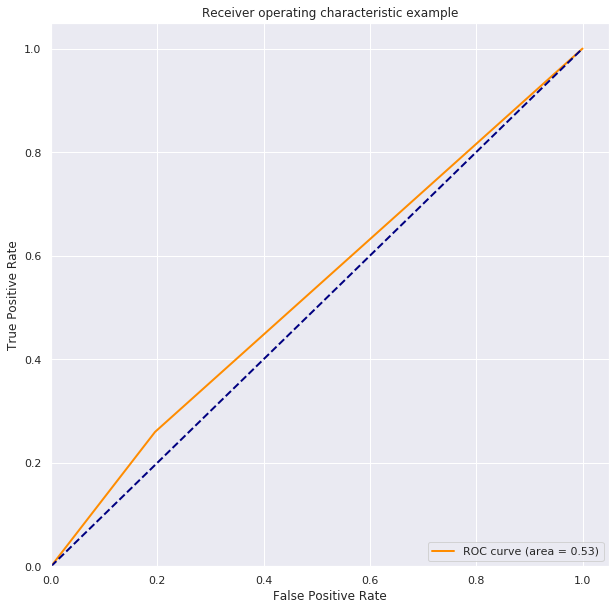

In [61]:
#y_score = ocs.decision_function(X_test_te)
 ###計算真正率和假正率
fpr,tpr,threshold = roc_curve(y_test, y_pre_test_irf) ###計算真正率和假正率
###計算auc的值
roc_auc = auc(fpr,tpr)
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
 ###假正率為橫座標，真正率為縱座標做曲線
lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

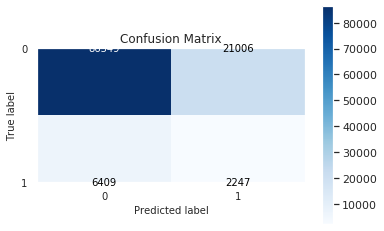

In [62]:
skplt.metrics.plot_confusion_matrix(y_test, y_pre_test_irf)

In [63]:
cr = classification_report(y_test,y_pre_test_irf)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.80      0.86    107355
           1       0.10      0.26      0.14      8656

    accuracy                           0.76    116011
   macro avg       0.51      0.53      0.50    116011
weighted avg       0.87      0.76      0.81    116011



In [64]:
cro = classification_report(y_outliers,y_pre_outliers_irf)
print(cro)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.26      0.41     29155

    accuracy                           0.26     29155
   macro avg       0.50      0.13      0.21     29155
weighted avg       1.00      0.26      0.41     29155



D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [67]:
confusion_matrix(y_test,y_pre_test_irf)

array([[86349, 21006],
       [ 6409,  2247]], dtype=int64)

In [72]:
confusion_matrix(y_outliers,y_pre_outliers_irf)

array([[    0,     0],
       [21627,  7528]], dtype=int64)

# OneClassSVM(nu=0.15, kernel='rbf', gamma=0.1)+TargetEncoding

In [107]:
ocs = svm.OneClassSVM(nu=0.15, kernel='rbf', gamma=0.1)

In [108]:
ocs.fit(X_train_te)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.1, kernel='rbf',
            max_iter=-1, nu=0.15, shrinking=True, tol=0.001, verbose=False)

In [128]:
y_pre_train_ocs = ocs.predict(X_train_te)
y_pre_test_ocs = ocs.predict(X_test_te)
y_pred_outliers_ocs = ocs.predict(X_outliers_te)

In [129]:
y_train_ocs=y_pre_train_ocs
y_train_ocs[y_pre_train_ocs==1]=0
y_train_ocs[y_pre_train_ocs==-1]=1

y_test_ocs=y_pre_test_ocs
y_test_ocs[y_pre_test_ocs==1]=0
y_test_ocs[y_pre_test_ocs==-1]=1

y_outliers_ocs=y_pred_outliers_ocs
y_outliers_ocs[y_pred_outliers_ocs==1]=0
y_outliers_ocs[y_pred_outliers_ocs==-1]=1
print(f1_score(y_test,y_test_ocs))
print(f1_score(y_outliers,y_outliers_ocs))
print(roc_auc_score(y_test,y_test_ocs))

0.4630479351752416
0.6727042183280544
0.7039999288062876


<Figure size 432x288 with 0 Axes>

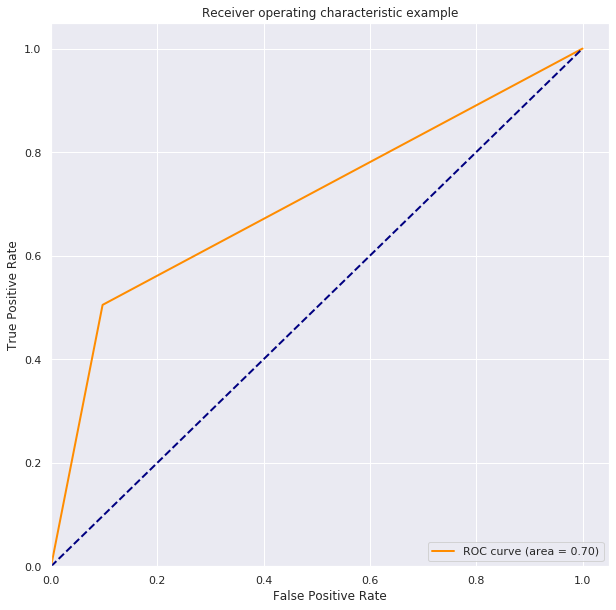

In [130]:
 ###計算真正率和假正率
fpr,tpr,threshold = roc_curve(y_test, y_test_ocs) ###計算真正率和假正率
###計算auc的值
roc_auc = auc(fpr,tpr)
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
 ###假正率為橫座標，真正率為縱座標做曲線
lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

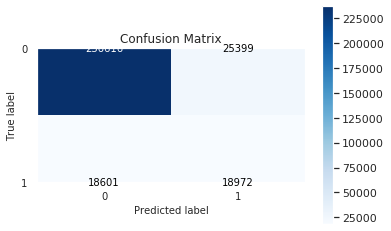

In [131]:
skplt.metrics.plot_confusion_matrix(y_test, y_test_ocs)

In [134]:
cr = classification_report(y_train,y_train_ocs)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.90      0.92    611522
           1       0.43      0.51      0.46     87516

    accuracy                           0.85    699038
   macro avg       0.68      0.71      0.69    699038
weighted avg       0.87      0.85      0.86    699038



In [135]:
cr = classification_report(y_test,y_test_ocs)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.90      0.91    262015
           1       0.43      0.50      0.46     37573

    accuracy                           0.85    299588
   macro avg       0.68      0.70      0.69    299588
weighted avg       0.86      0.85      0.86    299588



In [138]:
cro = classification_report(y_outliers,y_outliers_ocs)
print(cro)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.51      0.67    125089

    accuracy                           0.51    125089
   macro avg       0.50      0.25      0.34    125089
weighted avg       1.00      0.51      0.67    125089

